In [22]:
!python -m pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
import pandas as pd
from sklearn.metrics import mean_absolute_error
from prophet import Prophet
import pandas_datareader as pdr

In [67]:
df=pd.read_csv("history.csv")

In [68]:
df=df.reset_index()
df.rename(columns={'Date': 'ds', 'Units': 'y'}, inplace=True)

In [69]:
df

,index,ds,y
0,0,2010-06-29,1
1,1,2010-06-30,1
2,2,2010-07-01,1
3,3,2010-07-02,1
4,4,2010-07-06,1
...,...,...,...
3255,3255,2023-06-05,217
3256,3256,2023-06-06,221
3257,3257,2023-06-07,224
3258,3258,2023-06-08,234


In [70]:
df.isna().sum()

index    0
ds       0
y        0
dtype: int64

In [71]:
df.describe()

,index,y
count,3260.000000,3260.000000
mean,1629.500000,62.330675
std,941.225265,96.480399
min,0.000000,1.000000
25%,814.750000,9.000000
50%,1629.500000,16.000000
75%,2444.250000,46.250000
max,3259.000000,409.000000


In [72]:
df.describe

<bound method NDFrame.describe of       index          ds    y
0         0  2010-06-29    1
1         1  2010-06-30    1
2         2  2010-07-01    1
3         3  2010-07-02    1
4         4  2010-07-06    1
...     ...         ...  ...
3255   3255  2023-06-05  217
3256   3256  2023-06-06  221
3257   3257  2023-06-07  224
3258   3258  2023-06-08  234
3259   3259  2023-06-09  244

[3260 rows x 3 columns]>

In [73]:
df.shape

(3260, 3)

In [74]:
df=df.dropna()

In [75]:
import numpy as np
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
mean_imputer.fit_transform((df['y'].values).reshape(-1,1))

array([[  1.],
       [  1.],
       [  1.],
       ...,
       [224.],
       [234.],
       [244.]])

<Axes: xlabel='y'>

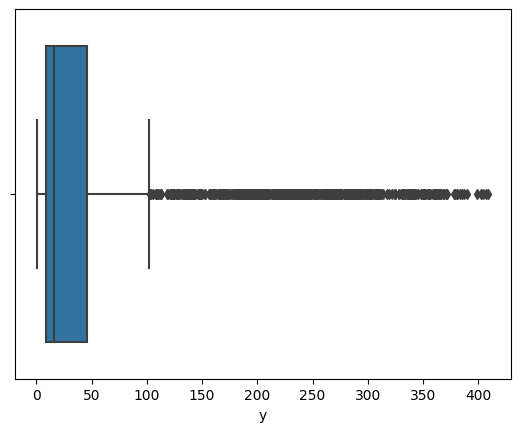

In [76]:
import seaborn as sns
sns.boxplot(x=df['y'])

In [77]:
# q1 = df.quantile(0.25)
# q3 = df.quantile(0.75)
# iqr = q3-q1
# print((df['y']<(q1-1.5*iqr)) | (df['y']>(q3+1.5*iqr)))

In [78]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjf5mjv0r/3jm61ije.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjf5mjv0r/fedvmi84.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67035', 'data', 'file=/tmp/tmpjf5mjv0r/3jm61ije.json', 'init=/tmp/tmpjf5mjv0r/fedvmi84.json', 'output', 'file=/tmp/tmpjf5mjv0r/prophet_modelyo8jwwin/prophet_model-20230611002713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [79]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [80]:
future_dates=model.make_future_dataframe(periods=30)

In [81]:
future_dates.tail()

,ds
3285,2023-07-05
3286,2023-07-06
3287,2023-07-07
3288,2023-07-08
3289,2023-07-09


In [82]:
prediction = model.predict(future_dates)

In [83]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3285,2023-07-05,240.348002,197.928318,273.647780,240.348002,240.348002,-3.702349,-3.702349,-3.702349,-0.554069,-0.554069,-0.554069,-3.148280,-3.148280,-3.148280,0.0,0.0,0.0,236.645653
3286,2023-07-06,240.360693,197.970134,275.865744,240.360693,240.360693,-3.659336,-3.659336,-3.659336,-0.703889,-0.703889,-0.703889,-2.955447,-2.955447,-2.955447,0.0,0.0,0.0,236.701357
3287,2023-07-07,240.373383,198.636057,275.978356,240.373383,240.373383,-3.610506,-3.610506,-3.610506,-0.839193,-0.839193,-0.839193,-2.771313,-2.771313,-2.771313,0.0,0.0,0.0,236.762877
3288,2023-07-08,240.386073,199.741026,275.800757,240.386073,240.386073,-1.215302,-1.215302,-1.215302,1.383084,1.383084,1.383084,-2.598386,-2.598386,-2.598386,0.0,0.0,0.0,239.170771
3289,2023-07-09,240.398764,200.526918,277.793419,240.398764,240.398764,-1.055605,-1.055605,-1.055605,1.383082,1.383082,1.383082,-2.438686,-2.438686,-2.438686,0.0,0.0,0.0,239.343159


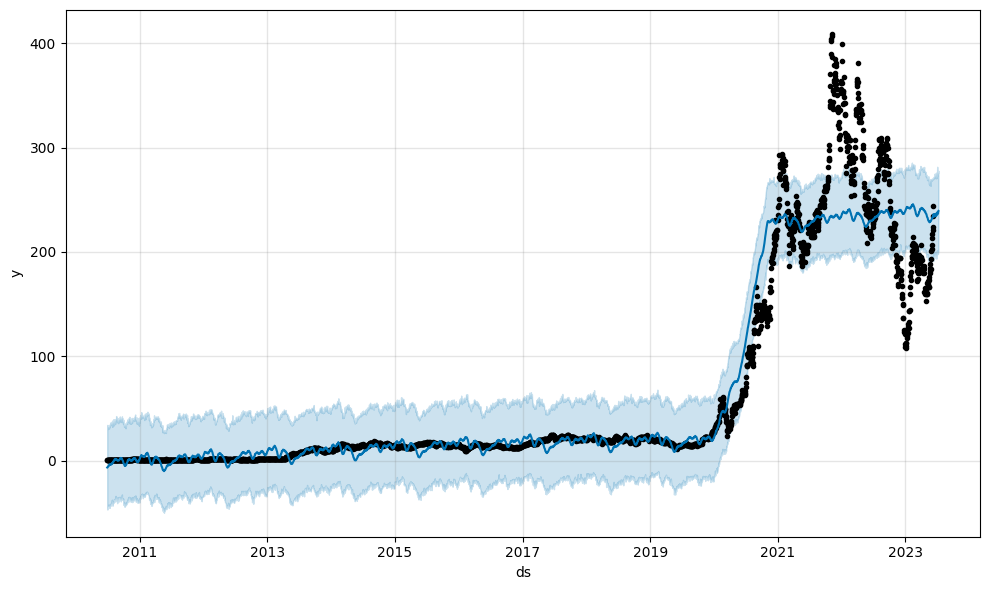

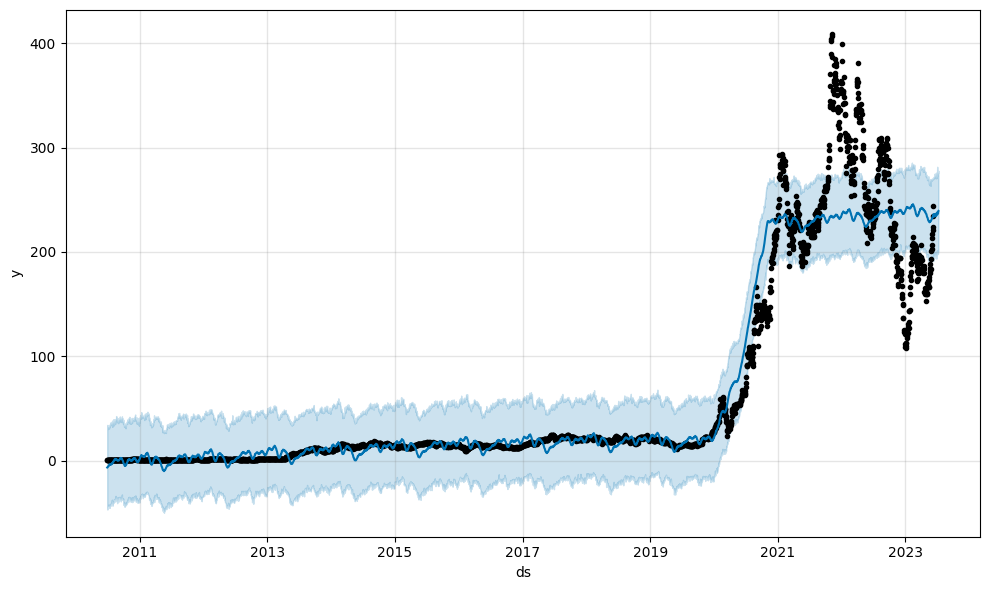

In [84]:
model.plot(prediction)

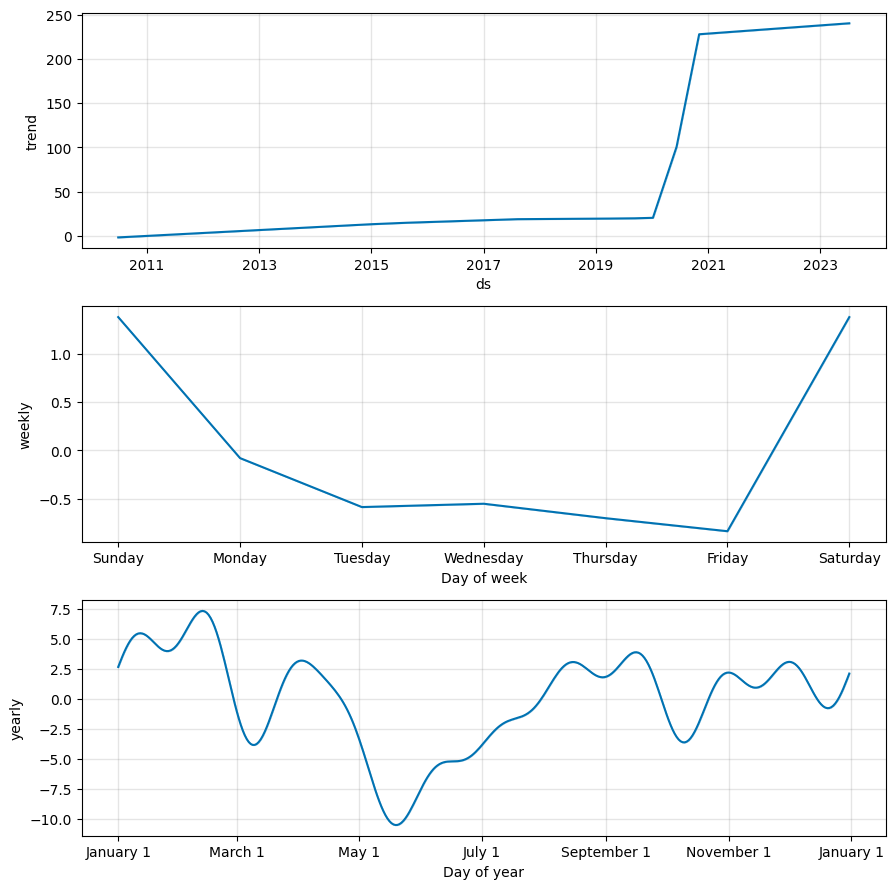

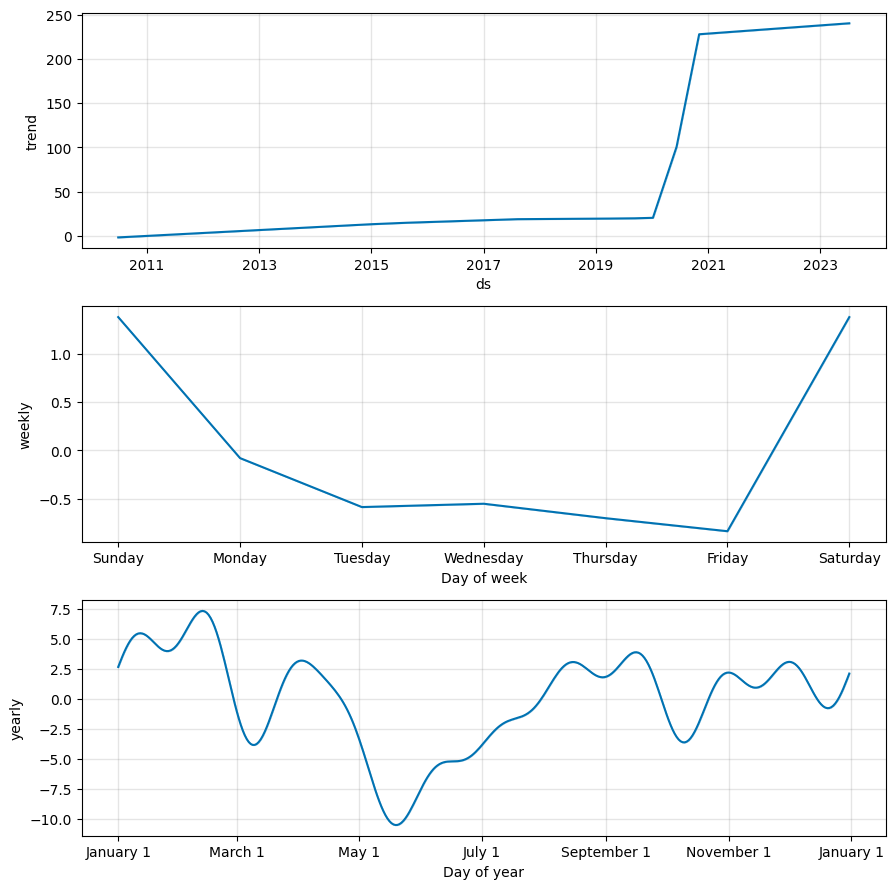

In [85]:
model.plot_components(prediction)

In [86]:
df.head()

,index,ds,y
0,0,2010-06-29,1
1,1,2010-06-30,1
2,2,2010-07-01,1
3,3,2010-07-02,1
4,4,2010-07-06,1


In [87]:
import pickle

In [88]:
pickle_out = open("classifier.pkl",mode="wb")
pickle.dump(model,pickle_out)
pickle_out.close()

In [89]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


In [90]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=8c0c496360922008dbaf2615b8aaebc502f58480fbb8730015d669685e0c2910
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [91]:
%%writefile app.py

import pickle
import streamlit as st
st.write('Hello world from Team RaktConnect, This is our CFG project - `RaktConnect`')
#st.write('## Predciting Blood needs with `RaktConnect`')
st.write('## Time Series Analysis !! No problem `RaktConnect` is with you ')
st.write('our website `https://team-6.herokuapp.com/`')

#loading the trained model
pickle_in = open('classifier.pkl','rb')
classifier = pickle.load(pickle_in)

@st.cache


def fb1_prediction(user_inp):
      future_dates=classifier.make_future_dataframe(periods=user_inp)
      predict1 = classifier.predict(future_dates)
      print(predict1)
      classifier.plot_components(predict1)
      return predict1

def plot_components(user_inp):
      future_dates=classifier.make_future_dataframe(periods=user_inp)
      predict1=classifier.predict(future_dates)
      predict2=st.area_chart(predict1.trend)
      predict2=st.line_chart(predict1.trend)
      return predict2

def main():
      #giving a title for our website
      st.title('RaktConnect - Predciting Future Is No More Magic')
      #GET INPUT FROM THE USER
      user_inp = st.text_input("Number of days","type here")
      #code for prediction
      result = ""
      result2 = ""

      #creating button for prediction

      if st.button("Future Stock Price"):
          result=fb1_prediction(int(user_inp))
          #future_dates=classifier.make_future_dataframe(periods=365)
          #predict1=classifier.predict(future_dates)
          #classifier.plot(predict1)
          #diagnosis=fb1_prediction(user_inp)

      st.success('The output is {}'.format(result))

      if st.button("Plot For Different Stocks Price"):
          result2=plot_components(int(user_inp))

      st.success('The graph is {}'.format(result2))

if __name__ == '__main__':
    main()
    


Writing app.py


In [92]:
from pyngrok import ngrok

In [93]:
!pip install pyngrok==4.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=88bc9c7899e53f0bf84e6eead24ac05fef15ac3acc6010d03d11d3fb011c0e81
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok
  Attempting uninstall: pyngrok
    Found existing installation: pyngrok 6.0.0
    Uninstalling pyngrok-6.0.0:
      Successfully uninstalled pyngrok-6.0.0


In [94]:
ngrok.set_auth_token("2HiLTI0fWi4t3R1bpxnKtDxTEzv_7Kfwx2PztWtdu3KYctGhb")

In [ ]:
!nohup streamlit ruk app.py --server.port 80 &
url = ngrok.connect(port = '80')
print(url)

In [ ]:
!streamlit run --server.port 80 app.py >/dev/null